# Extract data from txt file

In [1]:
import csv

In [2]:
# July 2018
stations = ['408588','401190','408589','401144','408590','401615','408591','401413','401896','401897','400642']

with open('00July.csv', 'w') as new_file:
    csv_writer = csv.writer(new_file)
    
    for i in range(1,30):
        with open('C:/Oakland/10July/d04_text_station_5min_2018_07_{}.txt'.
                  format(str(i).zfill(2)), 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
    
            for line in csv_reader:
                if line[1] in stations:
                    csv_writer.writerow(line)

# Process dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read saved csv files
July = pd.read_csv('00July.csv',header=None)

In [5]:
# Trim the data (first 17 columns)
July = July.iloc[:,0:17]

In [6]:
# Define dataframe header
columns = ['Timestamp','Station','District','Freeway','DoT','Lane Type','Station Length','Samples', '% Obs',
          'Total flow','Avg Occ','Ave Speed','Lane N Samples','Lane N Flow','Lane N Avg Occ','Lane N Avg Speed','Lane N obs']

In [7]:
# Input the header defined above
July.columns = columns

In [8]:
July.head()

,Timestamp,Station,District,Freeway,DoT,Lane Type,Station Length,Samples,% Obs,Total flow,Avg Occ,Ave Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N obs
0,07/01/2018 00:00:00,400642,4,980,E,ML,0.331,30,67,20.0,0.0035,60.2,10,0.0,0.0000,71.9,1
1,07/01/2018 00:00:00,401144,4,980,E,ML,0.280,30,100,71.0,0.0168,68.8,10,22.0,0.0162,71.9,1
2,07/01/2018 00:00:00,401190,4,980,E,ML,0.551,20,0,62.0,0.0261,66.4,10,23.0,0.0199,69.3,0
3,07/01/2018 00:00:00,401413,4,980,E,ML,0.300,50,60,184.0,0.0256,67.8,10,36.0,0.0245,76.5,1
4,07/01/2018 00:00:00,401615,4,980,E,ML,0.305,30,100,126.0,0.0283,67.7,10,37.0,0.0230,71.9,1


In [9]:
July.tail()

,Timestamp,Station,District,Freeway,DoT,Lane Type,Station Length,Samples,% Obs,Total flow,Avg Occ,Ave Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N obs
91858,07/29/2018 23:55:00,401897,4,980,E,FF,NaN,20,100,36.0,0.0151,NaN,10,12.0,0.0100,NaN,1
91859,07/29/2018 23:55:00,408588,4,980,E,FR,NaN,10,0,NaN,NaN,NaN,10,NaN,NaN,NaN,0
91860,07/29/2018 23:55:00,408589,4,980,E,FR,NaN,20,100,9.0,0.0070,NaN,10,7.0,0.0127,NaN,1
91861,07/29/2018 23:55:00,408590,4,980,E,OR,NaN,10,100,7.0,0.0059,NaN,10,7.0,0.0059,NaN,1
91862,07/29/2018 23:55:00,408591,4,980,E,OR,NaN,20,100,19.0,0.0101,NaN,10,6.0,0.0063,NaN,1


In [10]:
df = July.copy()

In [11]:
len(df)

91863

In [12]:
# Pass a list of column names (the important variables)
df = df[['Timestamp','Station','Total flow']]

In [13]:
# Replace Station ID
mymap = {
            408588  : 'f1',
            401190  : 'f2',
            408589  : 'f3',
            401144  : 'f4',
            408590  : 'f5',
            401615  : 'f6',
            408591  : 'f7',
            401413  : 'f8',
            401896  : 'f9',
            401897  : 'f10',
            400642  : 'f11'
        }
df['Station'] = df['Station'].map(mymap)

In [14]:
df['Station'].value_counts()

f10    8352
f11    8352
f8     8351
f3     8351
f2     8351
f9     8351
f6     8351
f7     8351
f1     8351
f5     8351
f4     8351
Name: Station, dtype: int64

In [15]:
df['Timestamp'].nunique()

8352

In [16]:
# Re-arrange the Dataframe to spatio-temporal format
df = df.pivot(index='Timestamp',columns='Station',values='Total flow')

In [17]:
df.keys()

Index(['f1', 'f10', 'f11', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9'], dtype='object', name='Station')

In [18]:
# Drop f1; all nan values
df.drop(columns=['f1'],inplace=True)

In [19]:
# Re-arrange spatial columns, so, the data is sequential
df = df[['f2','f3','f4','f5','f6','f7','f8','f9','f10','f11']]
cols = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10']
df.columns = cols
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
Timestamp,,,,,,,,,,
07/01/2018 00:00:00,62.0,20.0,71.0,15.0,126.0,34.0,184.0,84.0,68.0,20.0
07/01/2018 00:05:00,56.0,22.0,65.0,22.0,97.0,23.0,195.0,86.0,70.0,27.0
07/01/2018 00:10:00,49.0,22.0,53.0,17.0,115.0,38.0,181.0,74.0,68.0,23.0
07/01/2018 00:15:00,51.0,13.0,65.0,18.0,82.0,27.0,150.0,54.0,52.0,18.0
07/01/2018 00:20:00,52.0,11.0,63.0,12.0,82.0,37.0,155.0,69.0,61.0,17.0
...,...,...,...,...,...,...,...,...,...,...
07/29/2018 23:35:00,49.0,10.0,58.0,15.0,85.0,23.0,141.0,63.0,41.0,39.0
07/29/2018 23:40:00,56.0,8.0,61.0,14.0,83.0,14.0,111.0,63.0,35.0,61.0
07/29/2018 23:45:00,40.0,8.0,43.0,11.0,108.0,23.0,153.0,72.0,52.0,25.0


In [20]:
type(df.index)

pandas.core.indexes.base.Index

# Data Preprocessing II 
## Dataset integrity

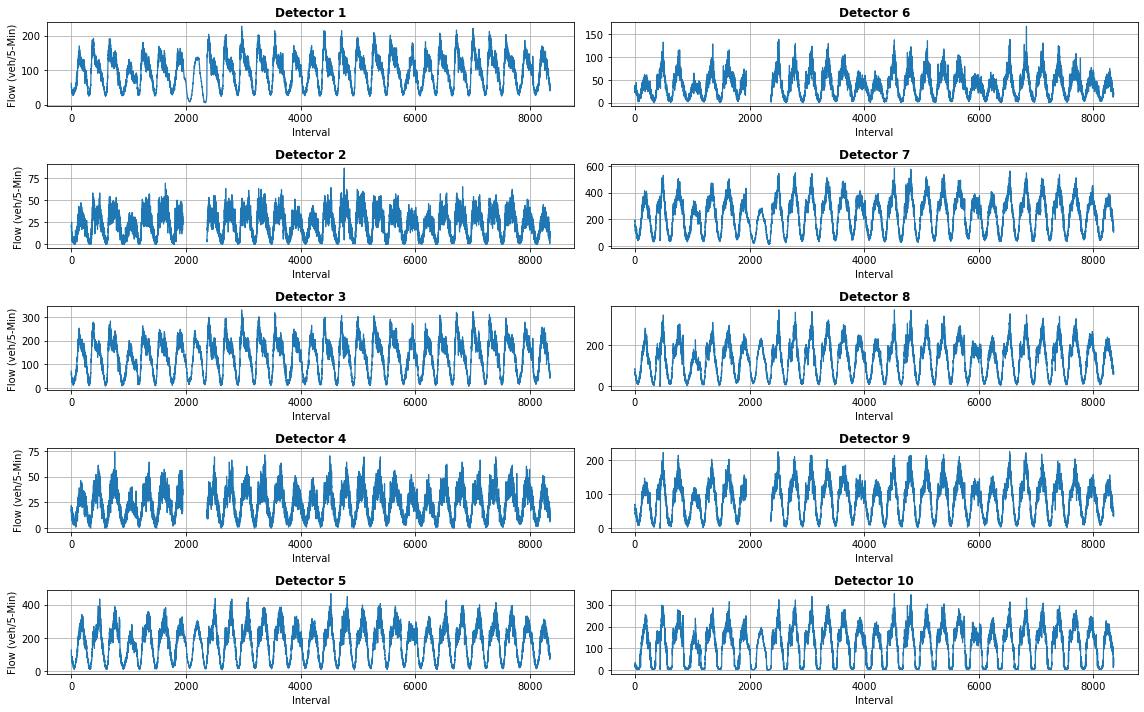

In [21]:
# plot data

# map timestamp to a variable x
x = np.linspace(0,8352,8352)

fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(16,10))

axes[0,0].plot(x,df['f1'], lw=1.2)
axes[1,0].plot(x,df['f2'], lw=1.2)
axes[2,0].plot(x,df['f3'], lw=1.2)
axes[3,0].plot(x,df['f4'], lw=1.2)
axes[4,0].plot(x,df['f5'], lw=1.2)
axes[0,1].plot(x,df['f6'], lw=1.2)
axes[1,1].plot(x,df['f7'], lw=1.2)
axes[2,1].plot(x,df['f8'], lw=1.2)
axes[3,1].plot(x,df['f9'], lw=1.2)
axes[4,1].plot(x,df['f10'], lw=1.2)


c = 0;
for b in range(0,2):
    for a in range(0,5):
        c += 1
        axes[a,b].set_xlabel('Interval')
        #axes[a,b].set_title('Detector '+str(c) +' (f'+str(c)+')',fontweight ="bold")
        axes[a,b].set_title('Detector '+str(c) ,fontweight ="bold")
        axes[a,b].grid()
        if b == 0:
            axes[a,b].set_ylabel('Flow (veh/5-Min)')

plt.tight_layout()
plt.show()

In [22]:
df.isna().sum()

f1       1
f2     431
f3       1
f4     431
f5       1
f6     431
f7       1
f8       1
f9     434
f10      0
dtype: int64

In [23]:
# Drop all nan columns
df.drop(columns=['f2','f4','f6','f9'],inplace=True)

In [24]:
cols = ['f1','f2','f3','f4','f5','f6']
df.columns = cols
df

,f1,f2,f3,f4,f5,f6
Timestamp,,,,,,
07/01/2018 00:00:00,62.0,71.0,126.0,184.0,84.0,20.0
07/01/2018 00:05:00,56.0,65.0,97.0,195.0,86.0,27.0
07/01/2018 00:10:00,49.0,53.0,115.0,181.0,74.0,23.0
07/01/2018 00:15:00,51.0,65.0,82.0,150.0,54.0,18.0
07/01/2018 00:20:00,52.0,63.0,82.0,155.0,69.0,17.0
...,...,...,...,...,...,...
07/29/2018 23:35:00,49.0,58.0,85.0,141.0,63.0,39.0
07/29/2018 23:40:00,56.0,61.0,83.0,111.0,63.0,61.0
07/29/2018 23:45:00,40.0,43.0,108.0,153.0,72.0,25.0


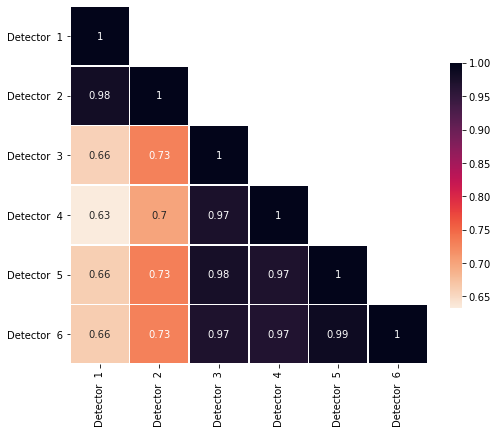

In [25]:
# The above as a plot

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

labels = ['Detector  1','Detector  2','Detector  3','Detector  4','Detector  5',
          'Detector  6']
crr.set_yticklabels(labels, rotation=0);
crr.set_xticklabels(labels, rotation=90);

### Check for missing values

In [26]:
df.isnull().any()

f1     True
f2     True
f3     True
f4     True
f5     True
f6    False
dtype: bool

In [27]:
df.isnull().sum().sum()

5

In [28]:
# Use interpolation to fill in Missing Completely random (MCR) nan values
df.interpolate(inplace = True)

In [29]:
df.isnull().any()

f1    False
f2    False
f3    False
f4    False
f5    False
f6    False
dtype: bool

### Check for missing timestamps

In [30]:
myser1 = pd.to_datetime(df.index)

In [31]:
type(myser1)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
# Create a date range for the specified interval using 5min fequency (as per the dataset)
date_range = pd.date_range('2018-07-01 00:00', '2018-07-29 23:59', freq='5Min')

In [33]:
myser = pd.Series(data=date_range)

# check if date range is in TrainVal timestamp and output the missing timestamps
myser[~myser.isin(myser1)]

Series([], dtype: datetime64[ns])

In [34]:
len(myser[~myser.isin(myser1)])

0

# Scale Data

In [35]:
import joblib

In [36]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [37]:
df_scaled = scaler.transform(df)

In [38]:
df_scaled.shape

(8352, 6)

In [39]:
df_scaled

array([[0.22764228, 0.20527859, 0.25303644, 0.2815534 , 0.22102426,
        0.05070423],
       [0.20325203, 0.18768328, 0.19433198, 0.29935275, 0.22641509,
        0.07042254],
       [0.17479675, 0.15249267, 0.23076923, 0.27669903, 0.19407008,
        0.05915493],
       ...,
       [0.13821138, 0.12316716, 0.21659919, 0.23139159, 0.18867925,
        0.06478873],
       [0.15853659, 0.13782991, 0.20647773, 0.21359223, 0.1967655 ,
        0.04788732],
       [0.14634146, 0.1202346 , 0.14979757, 0.15372168, 0.15363881,
        0.14366197]])

# Save Data

In [40]:
scaler_filename = "0000Test.save"
joblib.dump(df_scaled, scaler_filename) 

['0000Test.save']